In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import kagglehub
import os 
import shutil 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
# Dataset downloading and importing as pandas DataFrame
path = kagglehub.dataset_download("rukenmissonnier/manufacturing-data-for-polynomial-regression") 

for file in os.listdir(path):
    src = os.path.join(path, file)
    dst = os.path.join(".", file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to current directory")

print("Path to dataset files:", path)

df=pd.read_csv("manufacturing.csv")

Copied manufacturing.csv to current directory
Path to dataset files: C:\Users\shash\.cache\kagglehub\datasets\rukenmissonnier\manufacturing-data-for-polynomial-regression\versions\1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


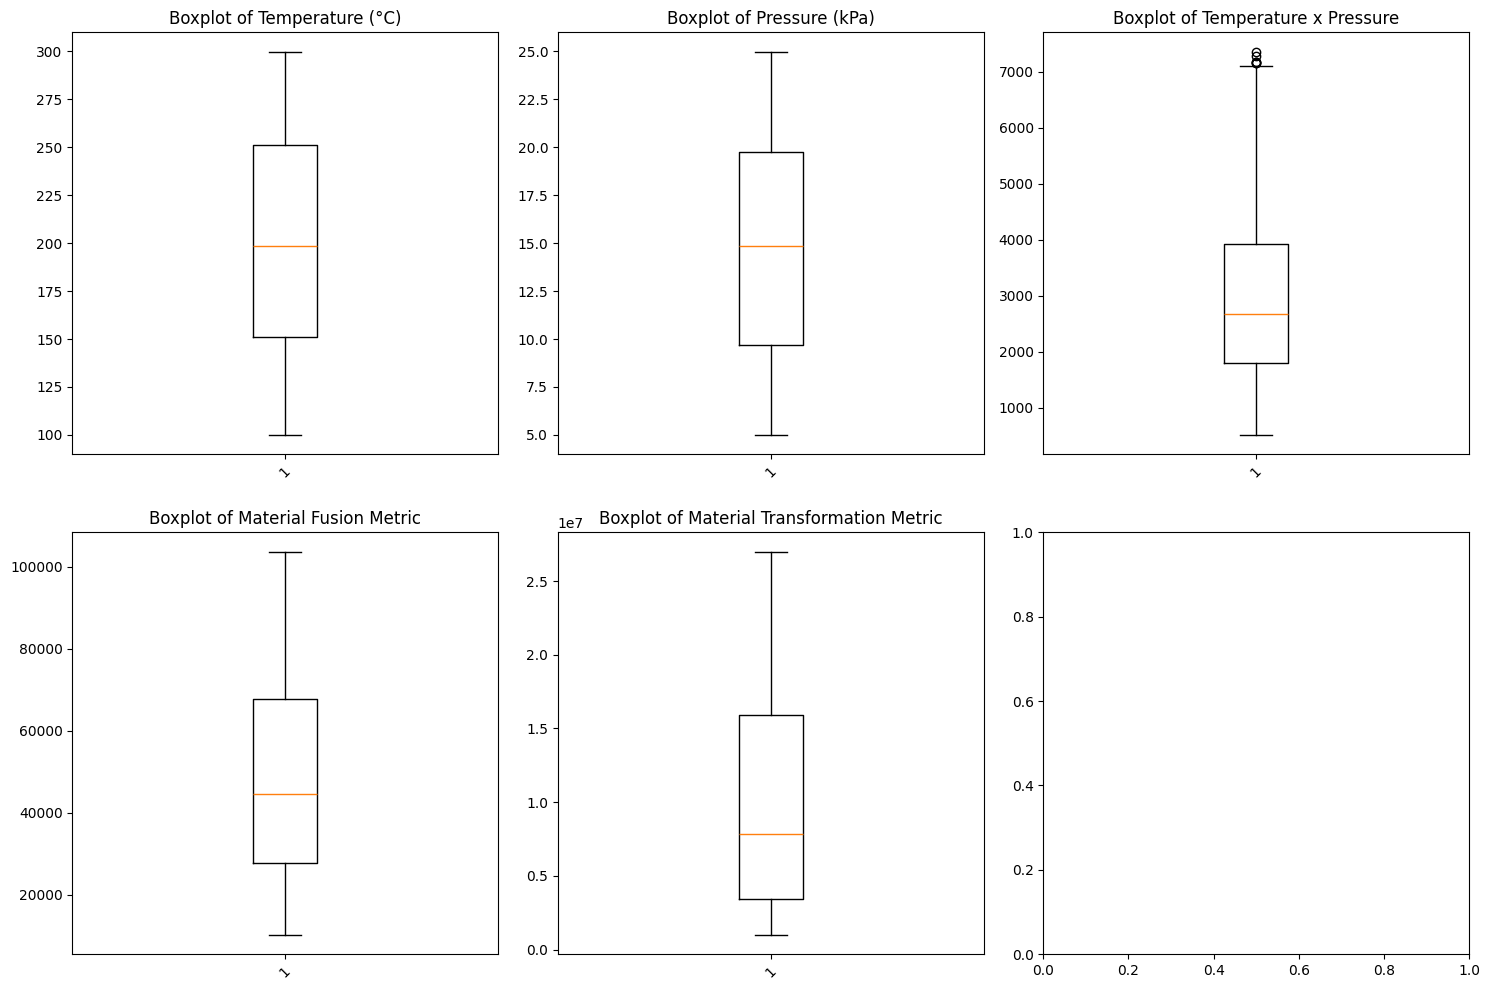

In [32]:
# FROM THE DATASET DESCRIPTION WE KNOW THAT FEATURES HAVE A NON-LINEAR RELATIONSHIP WITH THE TARGET VARIABLE
# lets first see heatmap of the dataset to see the correlation between features
# Individual boxplots for better visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(df.drop(columns=['Quality Rating']).columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# material fusion metric and temperature - strong correlation
# material transformation metric and material fusion metric - strong correlation
# material transformation metric and temperature - strong correlation

# we will see how it affects the target variable and should we drop any feature or not ?

In [35]:
X= df.drop(columns=['Quality Rating'])
y= df['Quality Rating']
x_train , x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Polynomial Features
poly = PolynomialFeatures(degree=6)

# we then transform x_train and x_test
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [58]:
# we build and train the model 
model= LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [59]:
# prediction 
y_pred = model.predict(x_test_poly)
print(y_pred.shape, y_test.shape)

(792,) (792,)


In [60]:
from sklearn.metrics import mean_absolute_error

# evaluate the model 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.17573528004281394
Mean Absolute Error: 0.25133432263095734
R^2 Score: 0.9991391880608435


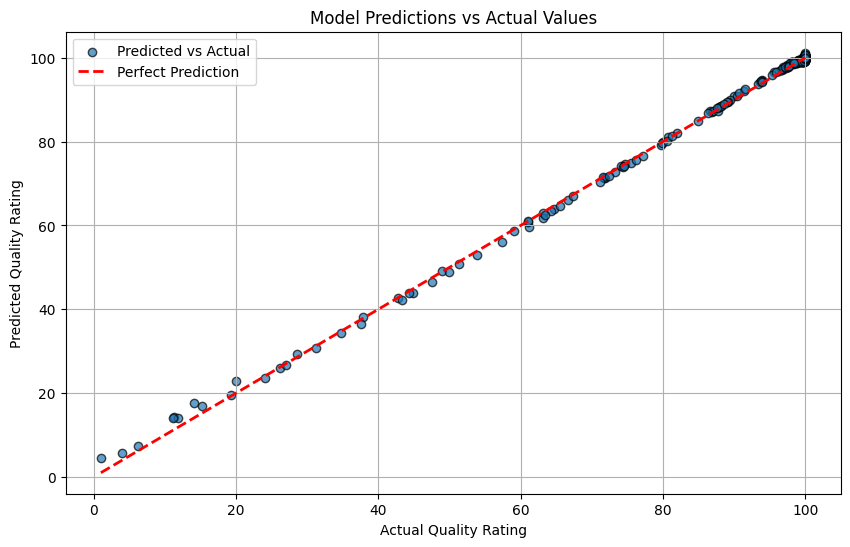

In [61]:

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted vs Actual')

# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.grid(True)

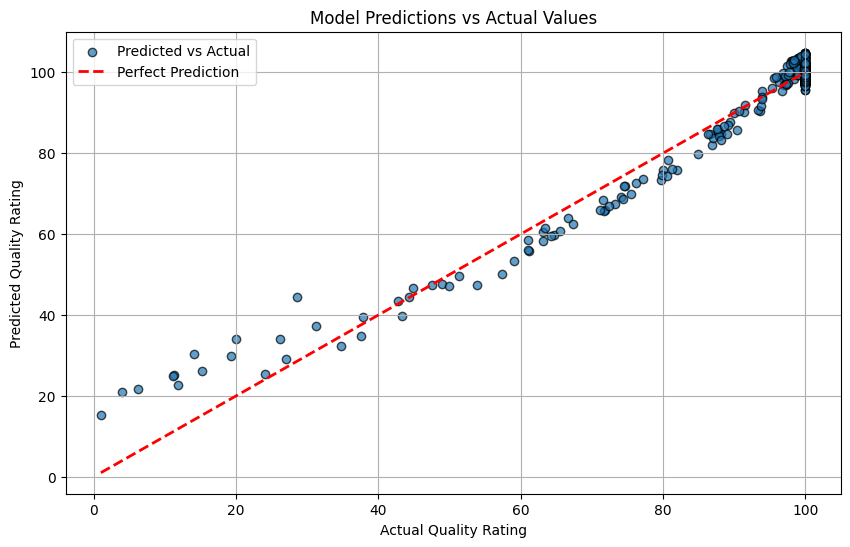

In [50]:

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted vs Actual')

# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.grid(True)